In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)



In [4]:
#Example 2  : Nonlinear SVM
   
data2 = loadmat('ex6data2.mat')
print(data2.keys())

y2 = data2['y']
X2 = data2['X']







dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [8]:
print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


In [6]:
def plotData(X, y ,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)


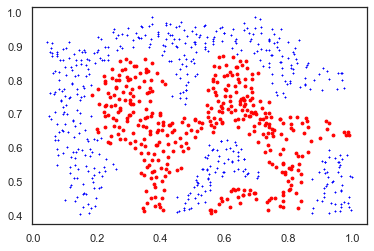

In [9]:

plotData(X2, y2,8)

In [10]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)



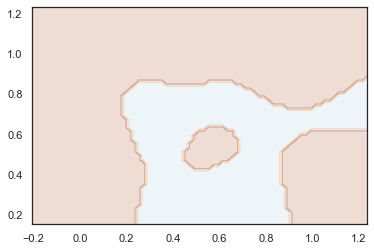

In [11]:
#apply SVM
clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

In [12]:
# Example 3  : Nonlinear SVM


data3 = loadmat('ex6data3.mat')
print(data3.keys())



dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [13]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)


X3: (211, 2)
y3: (211, 1)


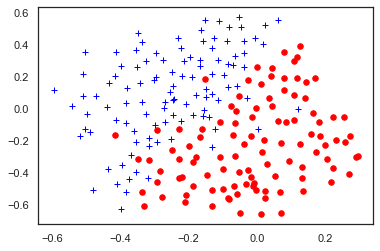

In [14]:
plotData(X3, y3,30)

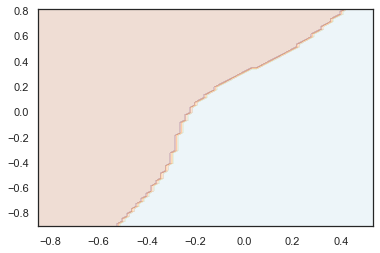

In [15]:
clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)


In [17]:
#  Training

spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')



In [20]:
print(spam_train)
print(spam_test)



{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'y': array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=uint8)}
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:39 2011', '__version__': '1.0', '__globals__': [], 'Xtest': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'ytest': array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
     

In [22]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()


In [23]:


print(X.shape, y.shape, Xtest.shape, ytest.shape)

svc = svm.SVC()
svc.fit(X, y)



(4000, 1899) (4000,) (1000, 1899) (1000,)


SVC()

In [24]:
# Testing
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))


Test accuracy = 98.7%
